# Kraskov-Stogbauer-Grassberger MI estimator + base distributions showcase

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
np.random.seed(42)

In [3]:
# Use Kraskov-Stogbauer-Grassberger MI estimator to run example tests.
from mutinfo.estimators.knn import KSG

estimator = KSG()

In [4]:
from utils.plots import *

In [5]:
MI_grid = np.linspace(0.0, 10.0, 11)
n_samples = 10000
n_runs = 100

X_dimension = 2
Y_dimension = 3
dimension = max(X_dimension, Y_dimension)

In [6]:
font = {'size' : 16}
matplotlib.rc('font', **font)

In [7]:
def run_tests(distribution_factory, estimator, MI_grid, n_samples, n_runs):
    estimated_MI = []

    for mutual_information in tqdm(MI_grid):
        current_run_estimates = []
        for run in range(n_runs):
            random_variable = distribution_factory(mutual_information)
            x, y = random_variable.rvs(n_samples)
        
            current_run_estimates.append(estimator(x, y))
        
        current_run_estimates = np.array(current_run_estimates)
        mean = np.mean(current_run_estimates)
        std = np.std(current_run_estimates) / np.sqrt(n_runs)
        
        estimated_MI.append([mean, 3*std])
    
    estimated_MI = np.array(estimated_MI)
    return estimated_MI

In [8]:
from mutinfo.distributions.base import CorrelatedNormal, CorrelatedStudent, CorrelatedUniform, GammaExponential, SmoothedUniform, UniformlyQuantized

In [9]:
estimated_MI = run_tests(
    lambda mutual_information : CorrelatedNormal(mutual_information, X_dimension, Y_dimension),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [04:02<00:00, 22.08s/it]


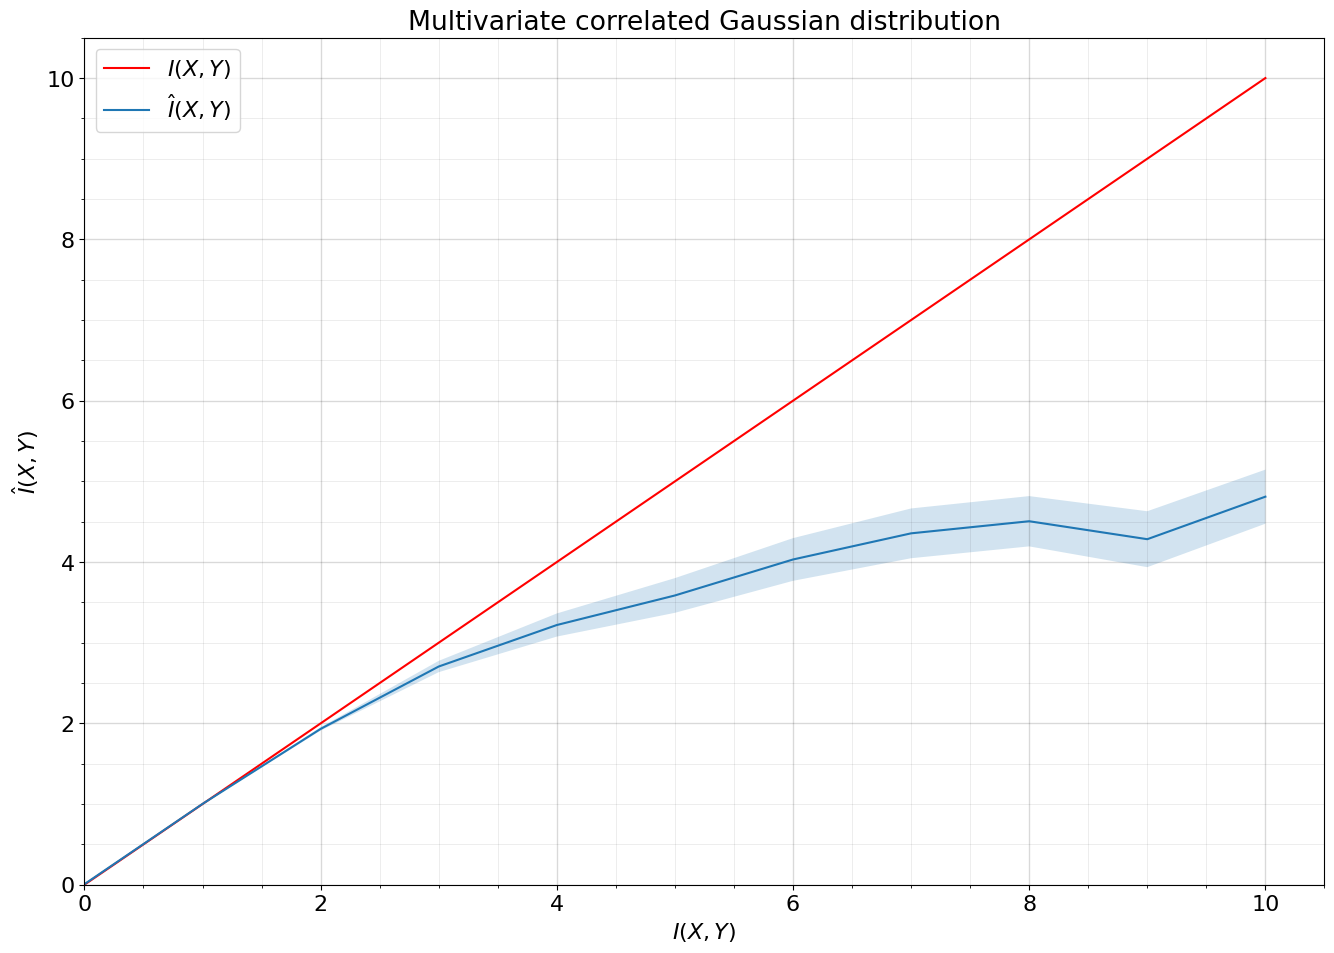

In [10]:
plot_estimated_MI(MI_grid, estimated_MI, "Multivariate correlated Gaussian distribution")

## Correlated uniform distribution

In [11]:
estimated_MI = run_tests(
    lambda mutual_information : CorrelatedUniform(mutual_information, X_dimension, Y_dimension),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [03:48<00:00, 20.77s/it]


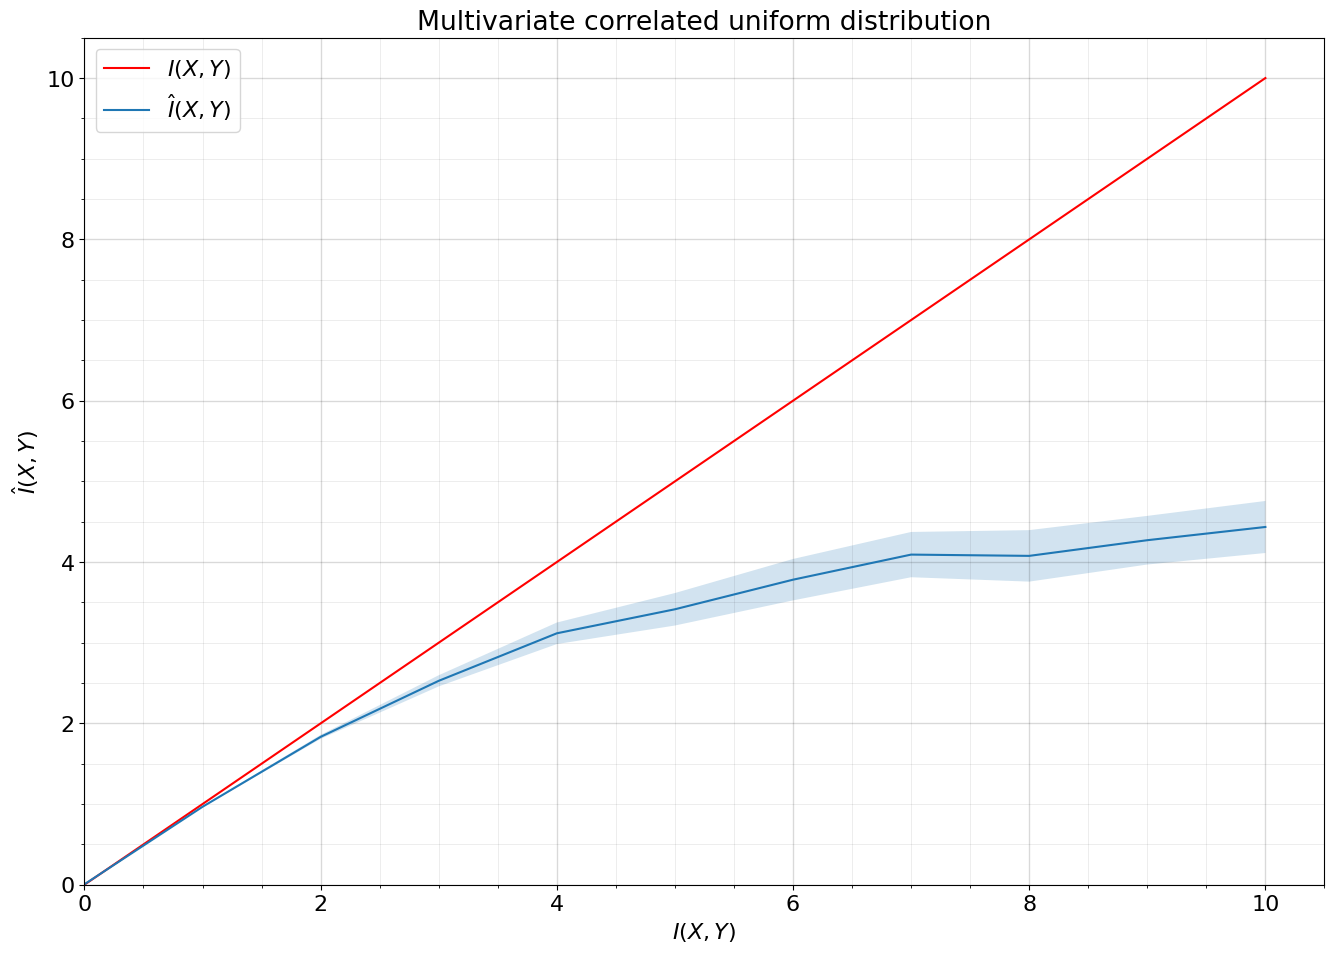

In [12]:
plot_estimated_MI(MI_grid, estimated_MI, "Multivariate correlated uniform distribution")

## Correlated Student's distribution

In [13]:
degrees_of_freedom = 1

In [14]:
estimated_MI = run_tests(
    lambda mutual_information : CorrelatedStudent(mutual_information, X_dimension, Y_dimension, degrees_of_freedom),
    estimator=estimator,
    MI_grid=MI_grid[1:],
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:45<00:00, 22.51s/it]


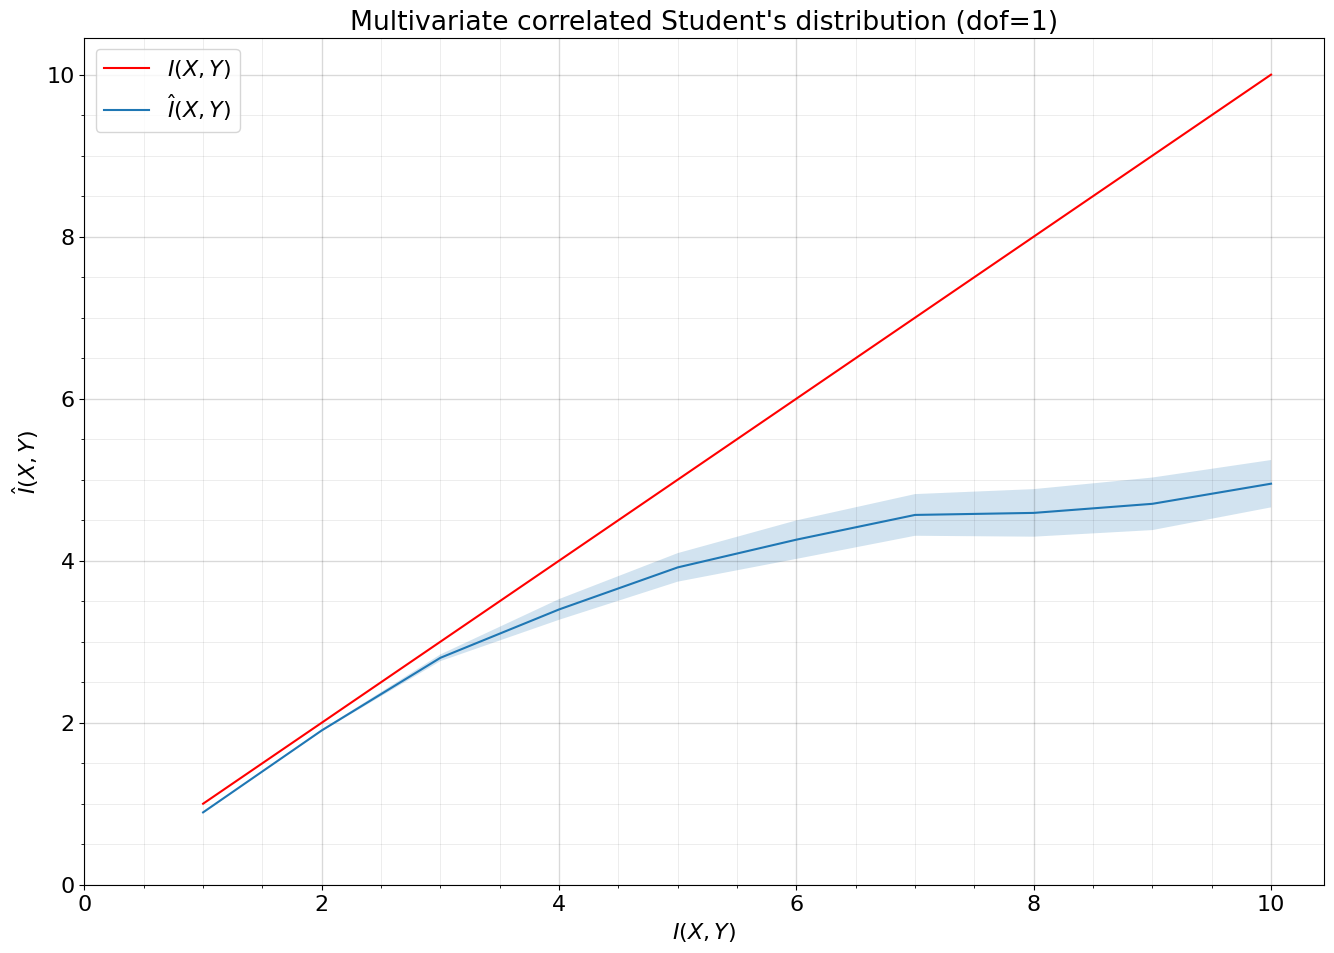

In [15]:
plot_estimated_MI(MI_grid[1:], estimated_MI, f"Multivariate correlated Student's distribution (dof={degrees_of_freedom})")

## Smoothed uniform distribution

In [16]:
estimated_MI = run_tests(
    lambda mutual_information : SmoothedUniform(mutual_information, X_dimension, Y_dimension),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [03:37<00:00, 19.77s/it]


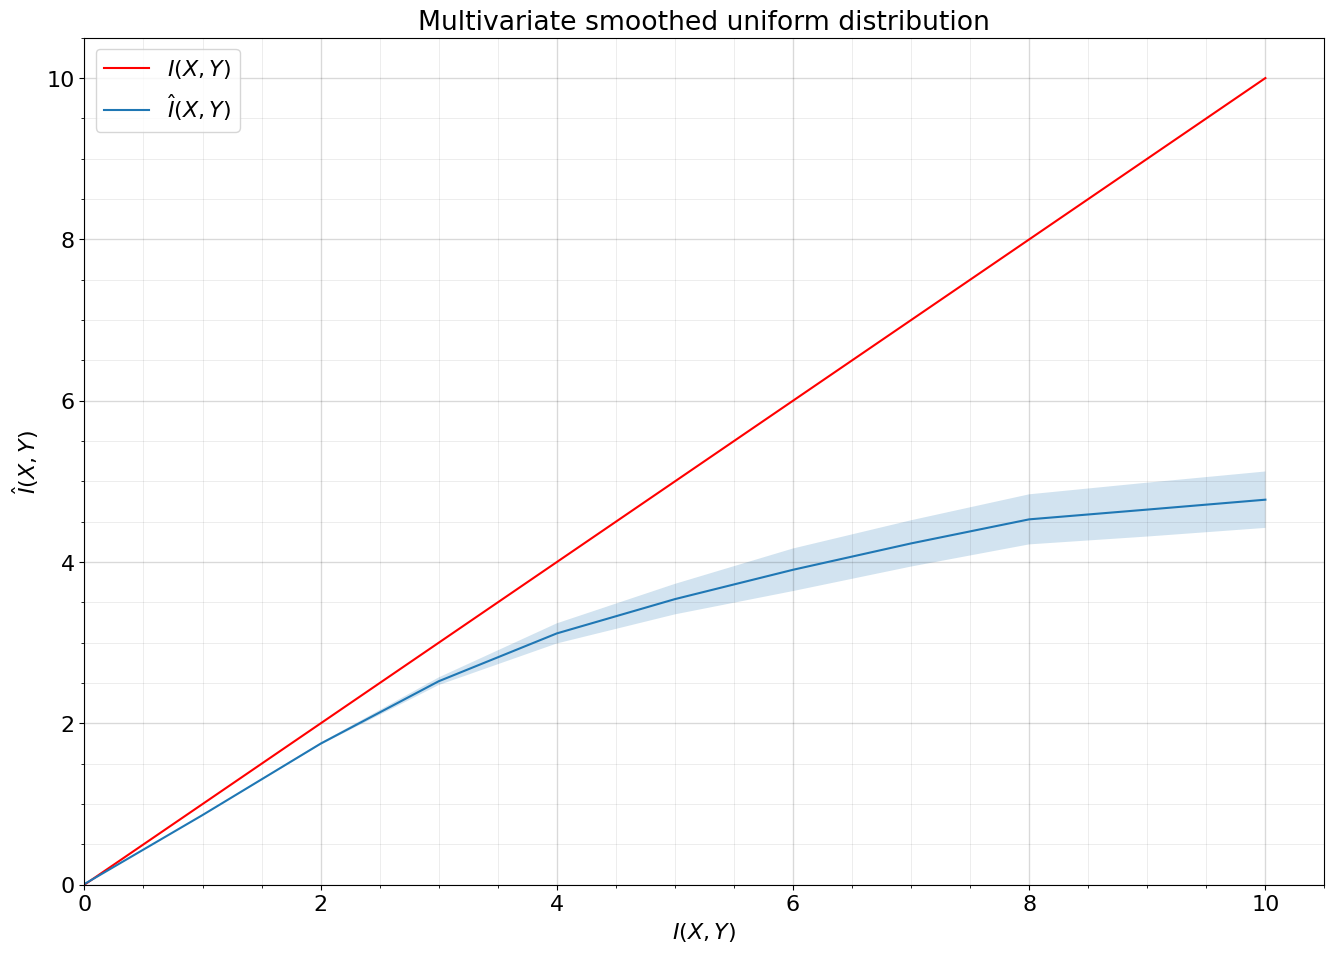

In [17]:
plot_estimated_MI(MI_grid, estimated_MI, f"Multivariate smoothed uniform distribution")

## Gamma-exponential distribution

In [18]:
estimated_MI = run_tests(
    lambda mutual_information : GammaExponential(mutual_information, X_dimension, Y_dimension),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [04:20<00:00, 23.68s/it]


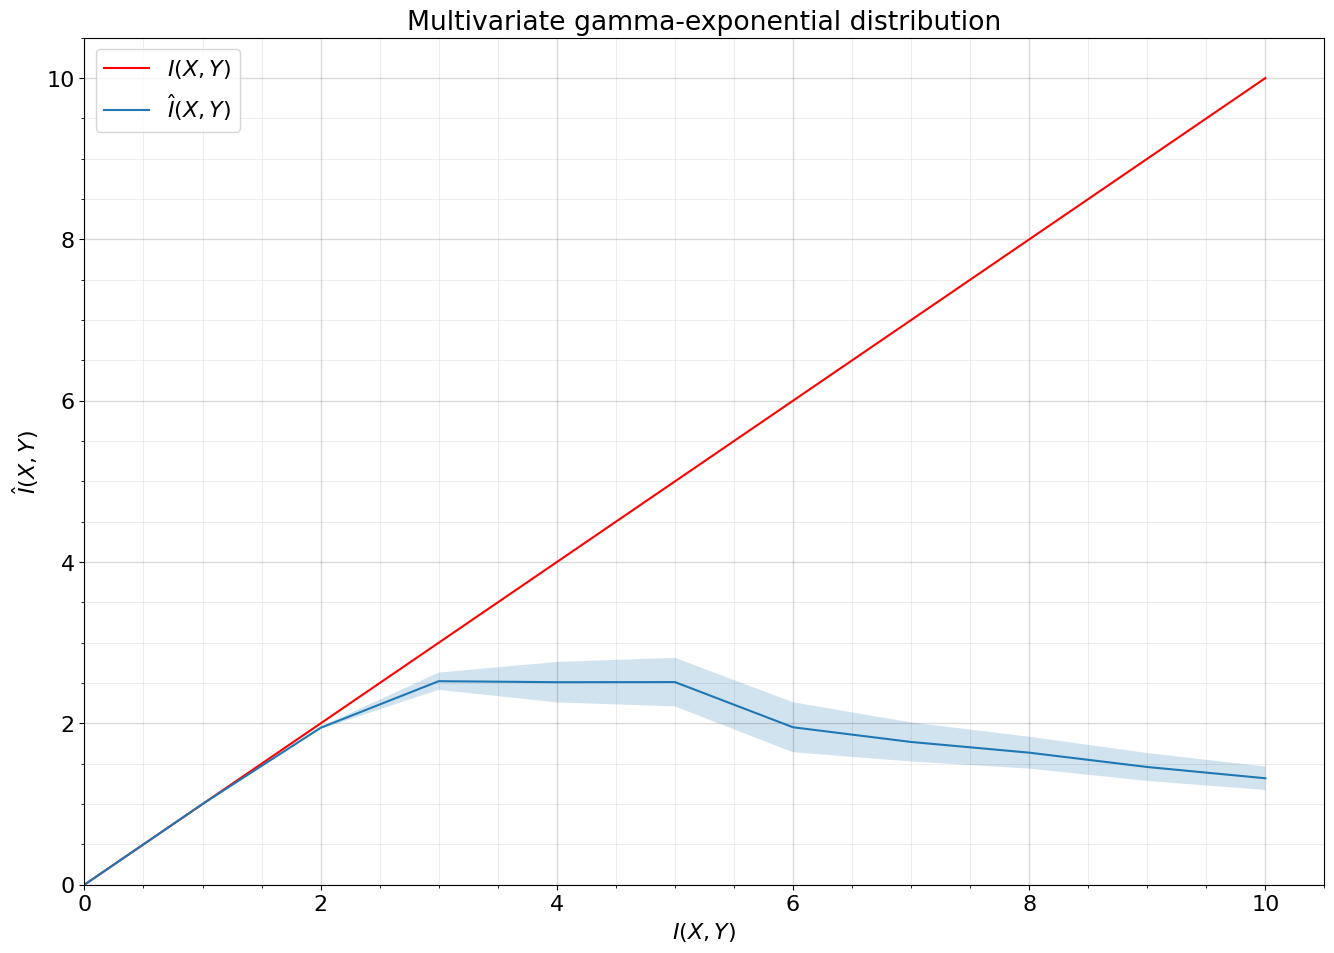

In [19]:
plot_estimated_MI(MI_grid, estimated_MI, f"Multivariate gamma-exponential distribution")

In [20]:
from scipy.stats import norm

estimated_MI = run_tests(
    lambda mutual_information : UniformlyQuantized(mutual_information, norm(loc=0.0, scale=1.0)),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [02:50<00:00, 15.51s/it]


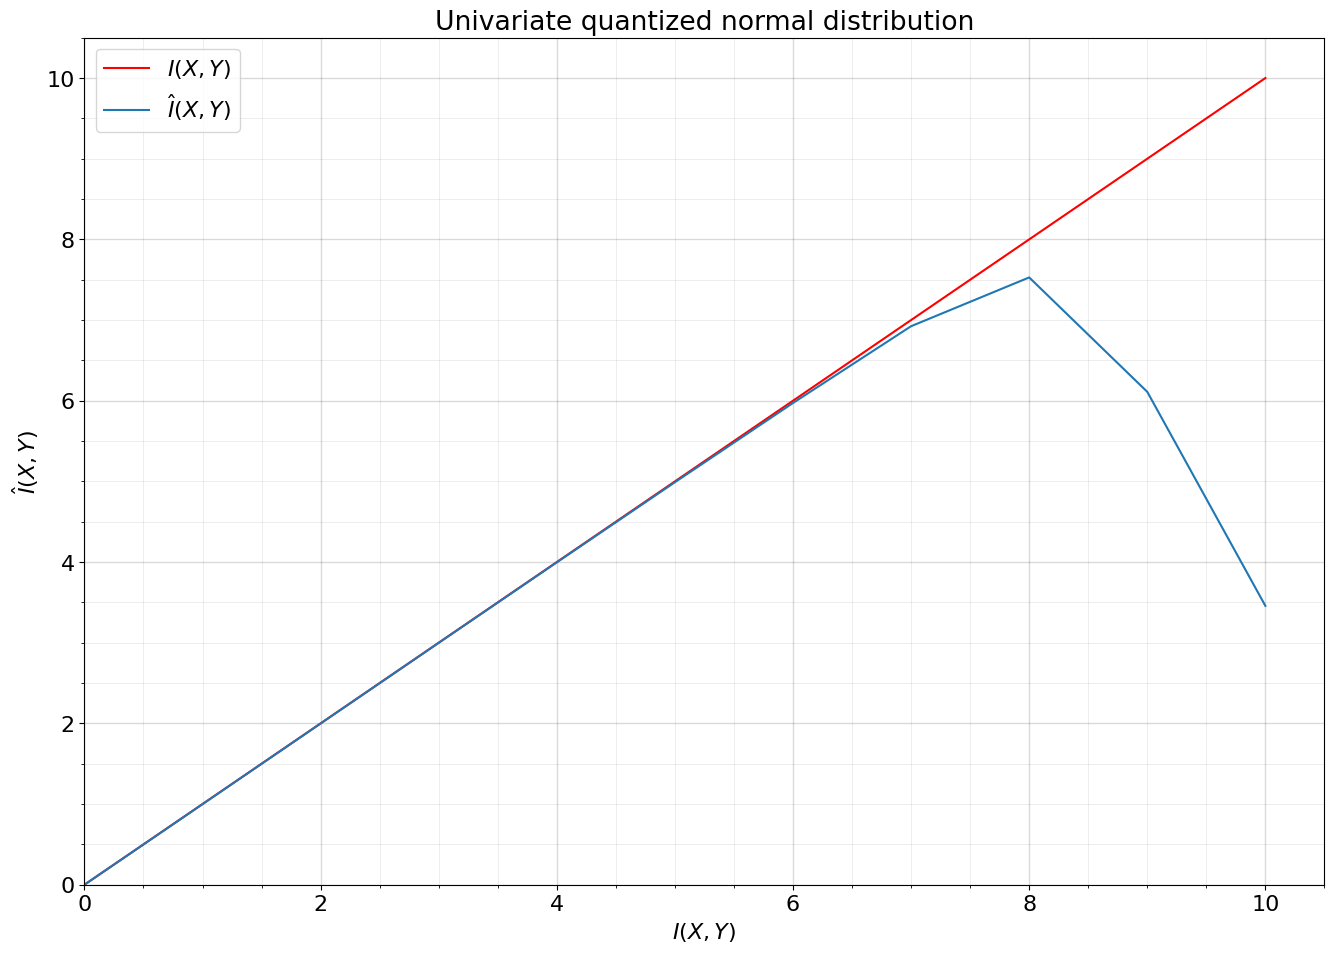

In [21]:
plot_estimated_MI(MI_grid, estimated_MI, f"Univariate quantized normal distribution")